# Домашнее задание к лекции «Логистическая регрессия и дискриминантный анализ»
http://prntscr.com/umci7o

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [11]:
iris = load_iris()

In [13]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [15]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
data_analitic = data[['sepal length (cm)', 'sepal width (cm)']]
data_analitic

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [31]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_analitic, data_class, test_size=0.25)

In [32]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [33]:
lda = LinearDiscriminantAnalysis()

In [34]:
# обучаем данные
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [35]:
# делаем прогноз на тестовой выборке
lda.predict(x_test)

array([2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1,
       0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2])

In [36]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(x_test)]).T

In [37]:
result

,0,1
0,1,2
1,0,0
2,0,0
3,0,0
4,2,1
5,0,1
6,1,1
7,2,2
8,2,2
9,1,1


In [38]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test, lda.predict(x_test))

0.8157894736842105

In [40]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.67826004,  8.10579186],
       [ 1.54984355, -4.07368522],
       [ 4.08652883, -3.92200703]])

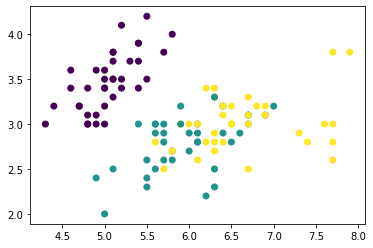

In [41]:
# визуализируем дискриминантную линию 
plt.scatter(x_train['sepal length (cm)'], x_train['sepal width (cm)'], c=y_train)
plt.show()

In [42]:
# посмотрим на наши центроиды
lda.means_

array([[5.04864865, 3.47567568],
       [5.97105263, 2.79210526],
       [6.62162162, 2.99459459]])

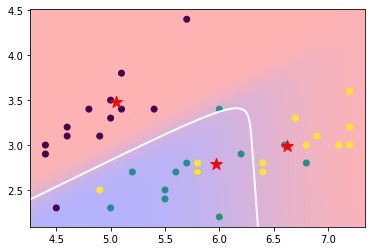

In [48]:
# сам scatter plot
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=y_test)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
# цвет точек - фактическое значение кластера
# цвет заливки - предсказание

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

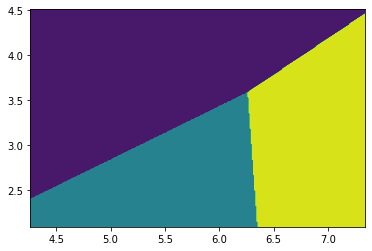

In [121]:
# проведем три разделяющих линии
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=y_test)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=250, marker='*')

# делаем условную "сетку"
nx, ny = 300, 300
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), 
                     np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# отделяем друг от друга
plt.contourf(xx, yy, Z )


## Кластеризация

In [128]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_analitic)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

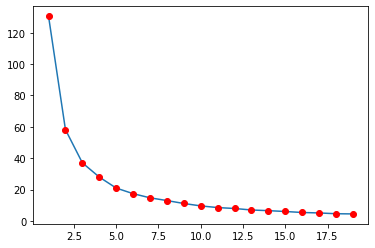

In [129]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

### Оптимальное количество кластеров - три

In [131]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler()

In [133]:
from sklearn.cluster import KMeans

In [134]:
# fit-transform сразу обучается и преобразует данные
x_scaled = scaler.fit_transform(data_analitic)

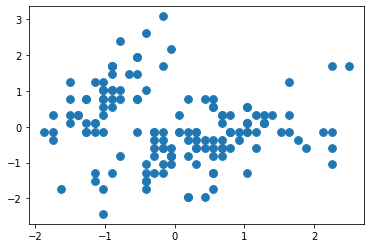

In [135]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1],cmap='autumn', s=60)

In [136]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(x_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

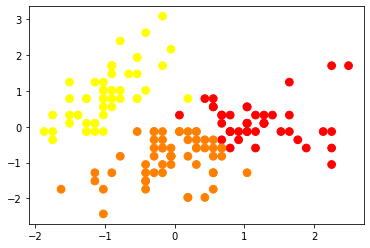

In [137]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], cmap='autumn', c=clusters, s=60)